In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, mean, stddev,avg
spark = SparkSession.builder.appName("AppSummaryStatistics").getOrCreate()
df = spark.read.csv("dbfs:/FileStore/tables/export.csv", header=True, inferSchema=True)
df.show()

+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|            App Name|Size (bytes)|   App id|Currency|Price|Rating (All)|Rating (Current)|Avg Rating (All)|Avy Rating (Current)|Version|Rating(Content)|        Prefrence|Supp Devices|Screenshot|Supp Lang|Vpp Lic|
+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|     PAC-MAN Premium|   100788224|281656475|     USD| 3.99|       21292|              26|             4.0|                 4.5|  6.3.5|             4+|            Games|          38|         5|       10|      1|
|Evernote - stay o...|   158578688|281796108|     USD|  0.0|      161065|              26|             4.0|                 3.5|  8.2.2|            

In [0]:
summary_df = df.groupBy("Avg Rating (All)").agg(
    count("Rating (All)").alias("num_Rating (All)"),
    
    stddev("Rating (All)").alias("std_dev_Ratings (All)"),
)


display(summary_df)

Avg Rating (All),num_Rating (All),std_dev_Ratings (All)
0.0,929,0.0
3.5,702,121402.43867549911
4.5,2663,98461.50384751921
2.5,196,31599.534571559234
1.0,44,67.30644867935493
4.0,1626,40663.286575614555
3.0,383,38282.764039463436
2.0,106,18942.88526700945
1.5,56,389.0611543423242
5.0,492,49216.28909050784


In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
spark = SparkSession.builder.appName("DataVisualization").getOrCreate()


In [0]:
df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/export.csv")
pandas_df = df.toPandas()


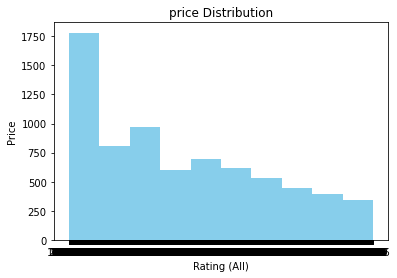

In [0]:
plt.hist(pandas_df['Rating (All)'], bins=10, color='skyblue')
plt.xlabel('Rating (All)')
plt.ylabel('Price')
plt.title('price Distribution')
plt.show()


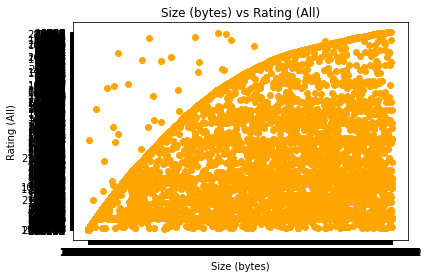

In [0]:
plt.scatter(pandas_df['Size (bytes)'], pandas_df['Rating (All)'], color='orange')
plt.xlabel('Size (bytes)')
plt.ylabel('Rating (All)')
plt.title('Size (bytes) vs Rating (All)')
plt.show()


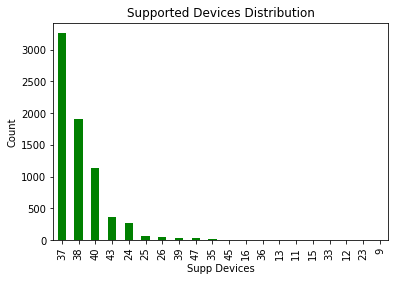

In [0]:
device_counts = pandas_df['Supp Devices'].value_counts()
device_counts.plot(kind='bar', color='green')
plt.xlabel('Supp Devices')
plt.ylabel('Count')
plt.title('Supported Devices Distribution')
plt.show()


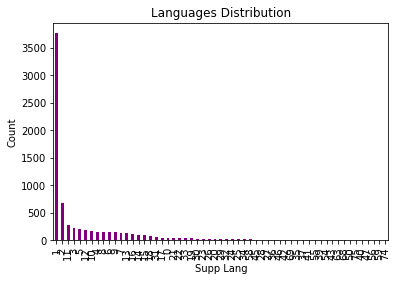

In [0]:
language_counts = pandas_df['Supp Lang'].value_counts()
language_counts.plot(kind='bar', color='purple')
plt.xlabel('Supp Lang')
plt.ylabel('Count')
plt.title('Languages Distribution')
plt.show()
